In [1]:
!ls ../../Data/

twoBlob.csv


In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [188]:
def shuffle(df, axis=0):
        shuffled_df = df.copy()
        shuffled_df = np.random.shuffle(shuffled_df.values),axis=axis)
        return shuffled_df


In [202]:
data = pd.read_csv('../../Data/twoBlob.csv',header=None)
data.head()

,0,1,2,3,4
0,-0.98204,0.125080,-0.040413,0.082823,-0.107010
1,-0.97887,-0.013292,0.033555,-0.201170,-0.007040
2,-0.97321,0.077359,0.096201,-0.110680,-0.159300
3,-0.97215,0.055051,0.036365,-0.145900,-0.171130
4,-0.96419,0.160610,0.038552,-0.206470,0.020547


In [203]:
np.random.shuffle(data.values)
data.head()

,0,1,2,3,4
0,2.12060,0.394760,0.000000,0.00000,0.000000
1,0.49011,-0.323960,0.700130,0.39495,0.093117
2,-0.86160,-0.156790,0.240380,-0.19344,0.371290
3,3.49140,0.220400,-0.018166,-0.74765,0.365280
4,3.34260,-0.035549,-0.238600,-0.69360,0.169030


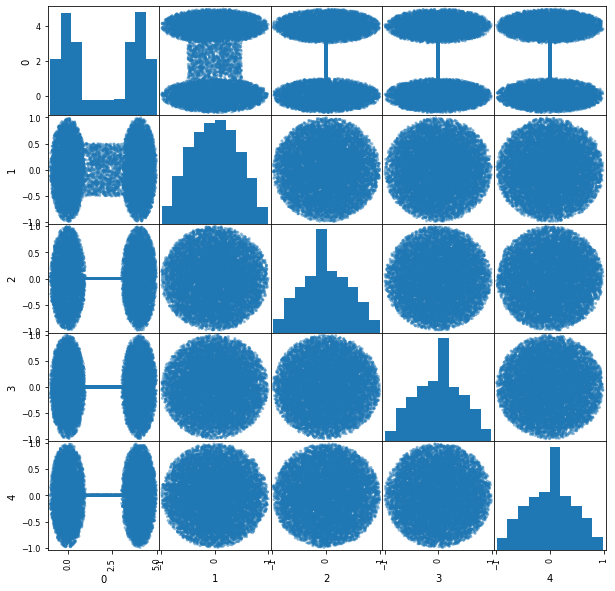

In [205]:
pd.plotting.scatter_matrix(data,figsize=[10,10]);

In [206]:
#estimate max distance
def _rand():
    return random.randint(0,data.shape[0])
def _dist(v1,v2):
    return sqrt(sum((v1-v2)**2))

D=[]
for i in range(10000):
    v1=np.array(data.iloc[_rand(),:])
    v2=np.array(data.iloc[_rand(),:])
    D.append(_dist(v1,v2))

5.916068991323069


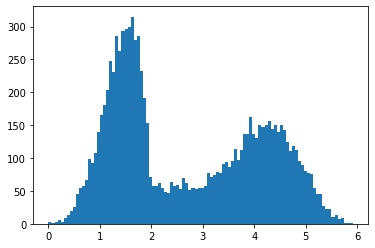

In [207]:
eps=max(D)
print(eps)
hist(D,bins=100);

In [208]:
eps

5.916068991323069

In [242]:
class CoverTree(object):
    def __init__(self,center,radius,path):
        self.center=center
        self.radius=radius
        self.counter=1  # number of points covered by this tree
        self.too_far=0  # count how many points were too far (should only be non-zero at root
        self.path=path
        self.children = []
    
    def no_of_children(self):
        return len(self.children)
    def get_level(self):
        return len(self.path)
    
    def find_path(self,x):
        d= _dist(x,self.center)
        #print(str(self.path),d)
        if d>self.radius:
             return None
        if len(self.children)==0:
            return [self]
        else:
            for child in self.children:
                child_path = child.find_path(x)
                if child_path is None:
                    continue
                else:
                    return [self]+child_path
            return [self]

    def insert(self,x):
        path=self.find_path(x)
        if path is None:
            return False

        #found a non-trivial path
        leaf=path[-1]
        new=CoverTree(x,leaf.radius/2,leaf.path+(leaf.no_of_children(),))
        leaf.children.append(new)
        for node in path:
            node.counter +=1
        return True
            
    def _str_to_level(self,max_level):
        s=str(self.path)+': r=%4.2f, no_child=%d, count=%d'%(self.radius,len(self.children),self.counter)+'\n'
        if self.get_level() < max_level and len(self.children)>0:
            for i in range(len(self.children)):
                s+=self.children[i]._str_to_level(max_level)
        return s    


In [250]:
point=np.array(data.iloc[0,:])
T=CoverTree(point,eps,())
print(T._str_to_level(1))

(): r=5.92, no_child=0, count=1



In [251]:
for i in range(1,data.shape[0]):
#for i in range(1,2000):
    point=np.array(data.iloc[i,:])
    T.insert(point)
    #print(T)
#print('resulting tree')

In [284]:
print(T._str_to_level(2))

(): r=5.92, no_child=2, count=11057
(0,): r=2.96, no_child=6, count=6277
(0, 0): r=1.48, no_child=40, count=2883
(0, 1): r=1.48, no_child=31, count=2300
(0, 2): r=1.48, no_child=9, count=753
(0, 3): r=1.48, no_child=8, count=215
(0, 4): r=1.48, no_child=1, count=89
(0, 5): r=1.48, no_child=3, count=36
(1,): r=2.96, no_child=5, count=4779
(1, 0): r=1.48, no_child=41, count=2623
(1, 1): r=1.48, no_child=25, count=1512
(1, 2): r=1.48, no_child=13, count=522
(1, 3): r=1.48, no_child=5, count=106
(1, 4): r=1.48, no_child=1, count=15



In [248]:
point=np.array(data.iloc[1000,:])
path=T.find_path(point)
for node in path:
    print(node.path)

()
(1,)
(1, 0)
(1, 0, 4)
(1, 0, 4, 16)


In [281]:
def gen_scatter(T,data,level=0):
    C=[]
    for i in range(data.shape[0]):
        point=np.array(data.iloc[i,:])
        C.append(T.find_path(point)[-1].path[level])

    figure(figsize=[15,5])
    scatter(data[0],data[1],s=1,c=C)
    t='Level=%d, colors=%d'%(level,max(C)+1)
    title(t);

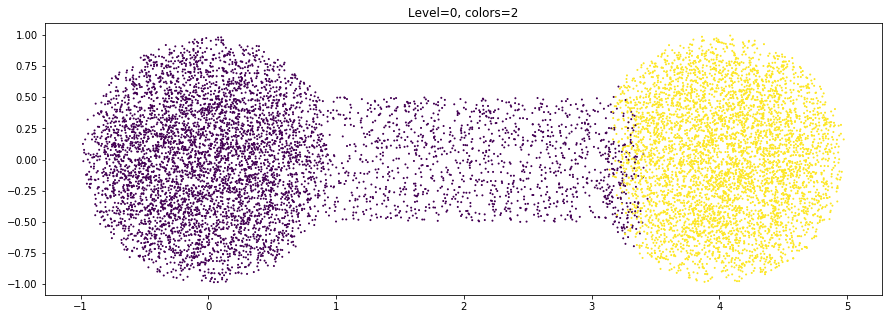

In [282]:
gen_scatter(T,data)

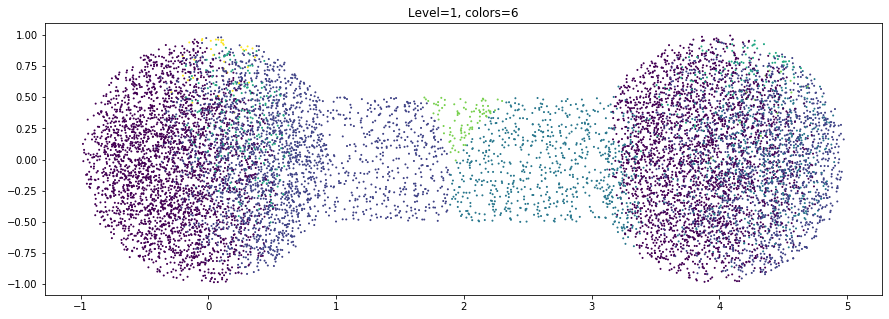

In [283]:
gen_scatter(T,data,level=1)